# Satellite observation : channels images (VIS, WV and IR)

The aim of this notebook is to indicate how to read the satellite data. They differenciate into 4 categories:
<ul>
    <li>'VIS006' : visible channel (0.6 µm)</li>
    <li>'IR_039' : infrared channel (3.9 µm)</li>
    <li>'IR_108' : infrared channel (10.8 µm)</li>
    <li>'WV_062' : water vapor channel (6.2 µm)</li>    
</ul>

The time step is 15 minutes, the spatial resolution, 3km. Each file contains for a time step, a channel and one geograhic zone ('NW' for North-West of France or 'SE' for South-East of France). The missing values are -32 267. The units are not the same according to the channels:
<ul>
    <li>About 'VIS006', the data are the toa (top of the atmosphere) bidirectional reflectances, in % </li>
    <li>About the others, IR and WV, the data are the toa brightness temperatures, in Kelvins </li>
</ul>

/!\The visible channel is by definition not visible at night; there are huge gaps of distribution between the day and night and a lot of missing values for this channel.

Remark : the *Basemap* library is required to plot the background map. Here is the command to type into in a terminal to install the package if you use the Anaconda environment : *conda install -c anaconda basemap*

In [1]:
from data_exploration.utils.user_configuration import *
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm 


In [2]:
####Cell containing the modifiable fields######
zone = 'SE'          #geographic zone
channel = 'VIS006'   #channel 
data_path = path + 'satellite/'   #path to the satellite data
day = '20180115_1430'     #date : day + hour

In [3]:
complete_path = data_path + zone + '/CHANNELS/' + channel + '/'
file = day+'.npz'      #file name

#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

In [4]:
#data loading
d = np.load(complete_path+file,allow_pickle=True)
d.files      #know the compressed file structure
data=d['arr_0']

Overview of data of type int16

In [5]:
data

array([[16, 16, 17, ...,  6,  6,  5],
       [19, 17, 13, ...,  6,  6,  5],
       [16, 15, 13, ...,  6,  6,  5],
       ...,
       [ 3,  3,  3, ...,  2,  3,  3],
       [ 3,  3,  3, ...,  2,  2,  3],
       [ 2,  2,  2, ...,  3,  3,  2]], dtype=int16)

Data dimensions : 
<ul>
<li>points number in longitude</li>
<li>points number in latitude</li>
</ul>    

In [6]:
data.shape

(123, 187)

Plot example for a given time step a given zone and a given channel:

<IPython.core.display.Javascript object>


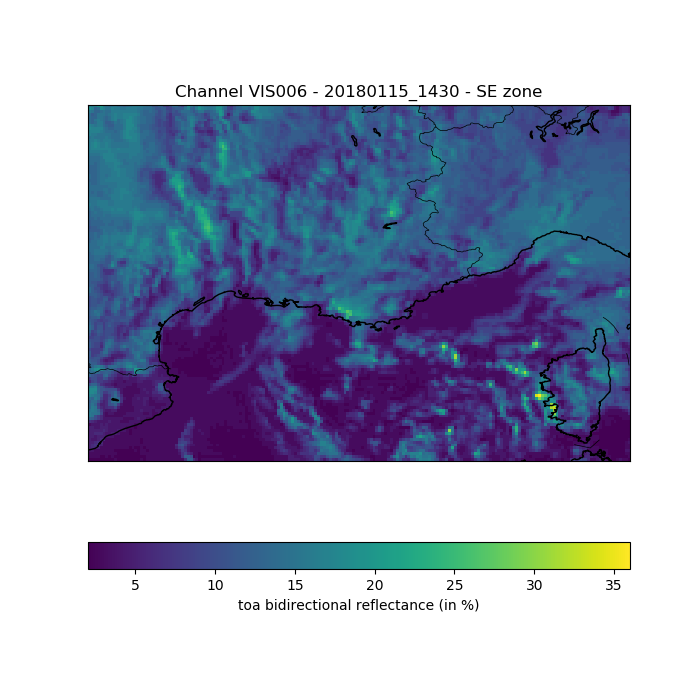

C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


In [7]:
fig,ax=plt.subplots(1,1,figsize=(7,7))

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='h',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#plot the data and the background map (coastlines and borders)

if channel=='VIS006':
    label_colorbar = 'toa bidirectional reflectance (in %)'
else:
    label_colorbar = 'toa brightness temperature (in K)'
m.drawcoastlines()
m.drawcountries()
img=m.imshow(data, interpolation='none', origin='upper')
plt.colorbar(img,orientation= 'horizontal').set_label(label_colorbar)
plt.title("Channel "+channel+" - "+day+" - "+zone+ " zone")
plt.show()

In [8]:
d.fid.close()